# CONTEXT :

Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [2]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [148]:
#Loading Dataset

df = pd.read_csv(r"E:\Data Trained studymaterial\Dataset\DSData-master\DSData-master\Advertising.csv")
df.head()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [149]:
df.shape

(200, 5)

In [150]:
df.drop(columns=['Unnamed: 0'] , inplace=True)

#Dropping coloumn "Unnamed: 0" as it is not necessary in our prediction.

In [35]:
#Checking for null values and data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [36]:
#Total count of each feature

df.sum()

TV           29408.5
radio         4652.8
newspaper     6110.8
sales         2804.5
dtype: float64

In [37]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:xlabel='TV', ylabel='sales'>

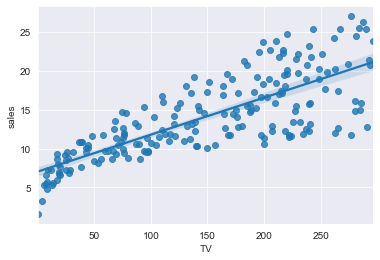

In [151]:
#Checking relationship of each feature with label 

sns.regplot(x='TV' , y='sales' , data = df )

In [ ]:
#Conclusion : The plot looks fairly linear between Tv and sales hence we comclude that
# as no. of advertisement in Tv increases sale unit increases.

<AxesSubplot:xlabel='radio', ylabel='sales'>

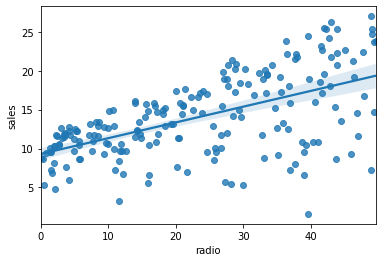

In [58]:
sns.regplot(x='radio' , y='sales' , data = df)

In [ ]:
#Radio also gives linear line

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

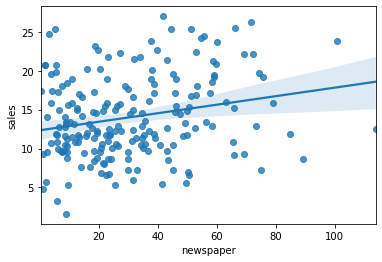

In [46]:
sns.regplot(x='newspaper' , y='sales' , data = df )

In [ ]:
#From newspaper ads we conclude that sales is restricted to some extent

In [152]:
#Checking Distribution and relationship using other methods :

X = df.drop(columns=['sales'])
y = df['sales']

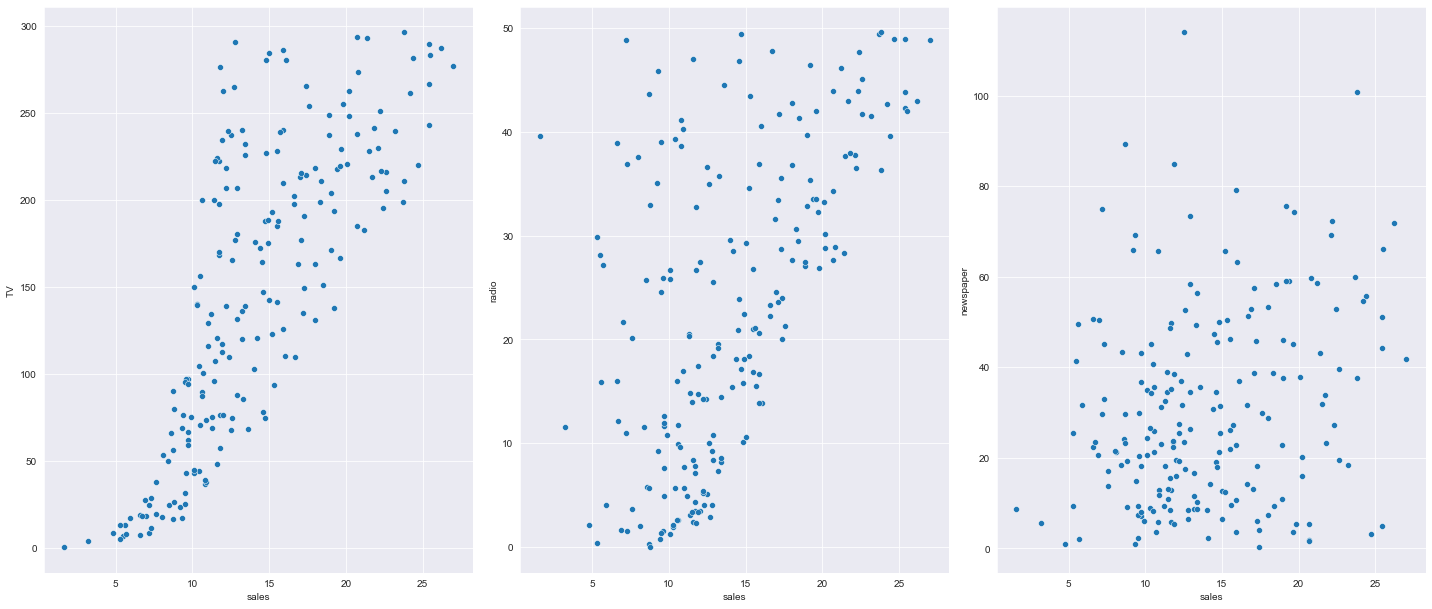

In [153]:
plt.figure(figsize=(20,25))

plotnumber=1

for column in X:
    if plotnumber<=9 : 
        ax=plt.subplot(3,3,plotnumber)
        sns.scatterplot(y,X[column])
        
    plotnumber+=1
plt.tight_layout()

In [ ]:
#As we can see Data points in newspaper is scattered non linear.That it has less contribution
# in sales as compared with no. of ads 

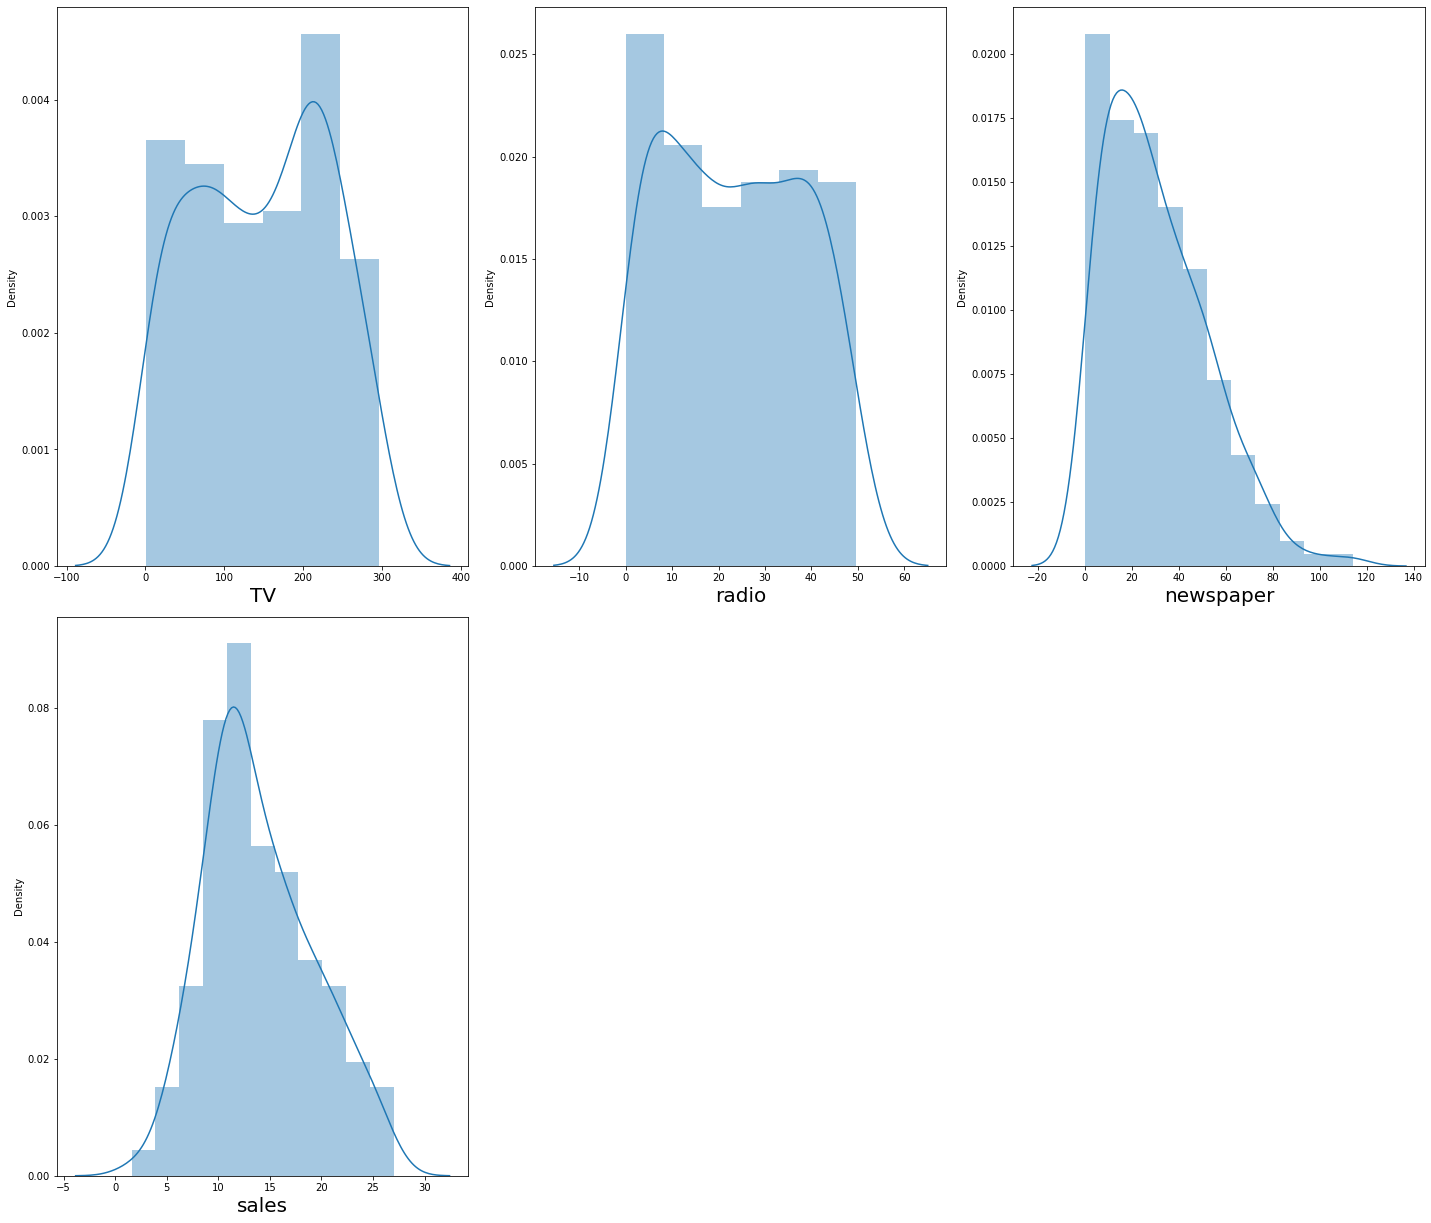

In [74]:
#Checking Data Distribution

plt.figure(figsize=(20,25))

plotnumber=1

for column in df:
    if plotnumber<=9 : 
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

#Data looks fine and normally distributed

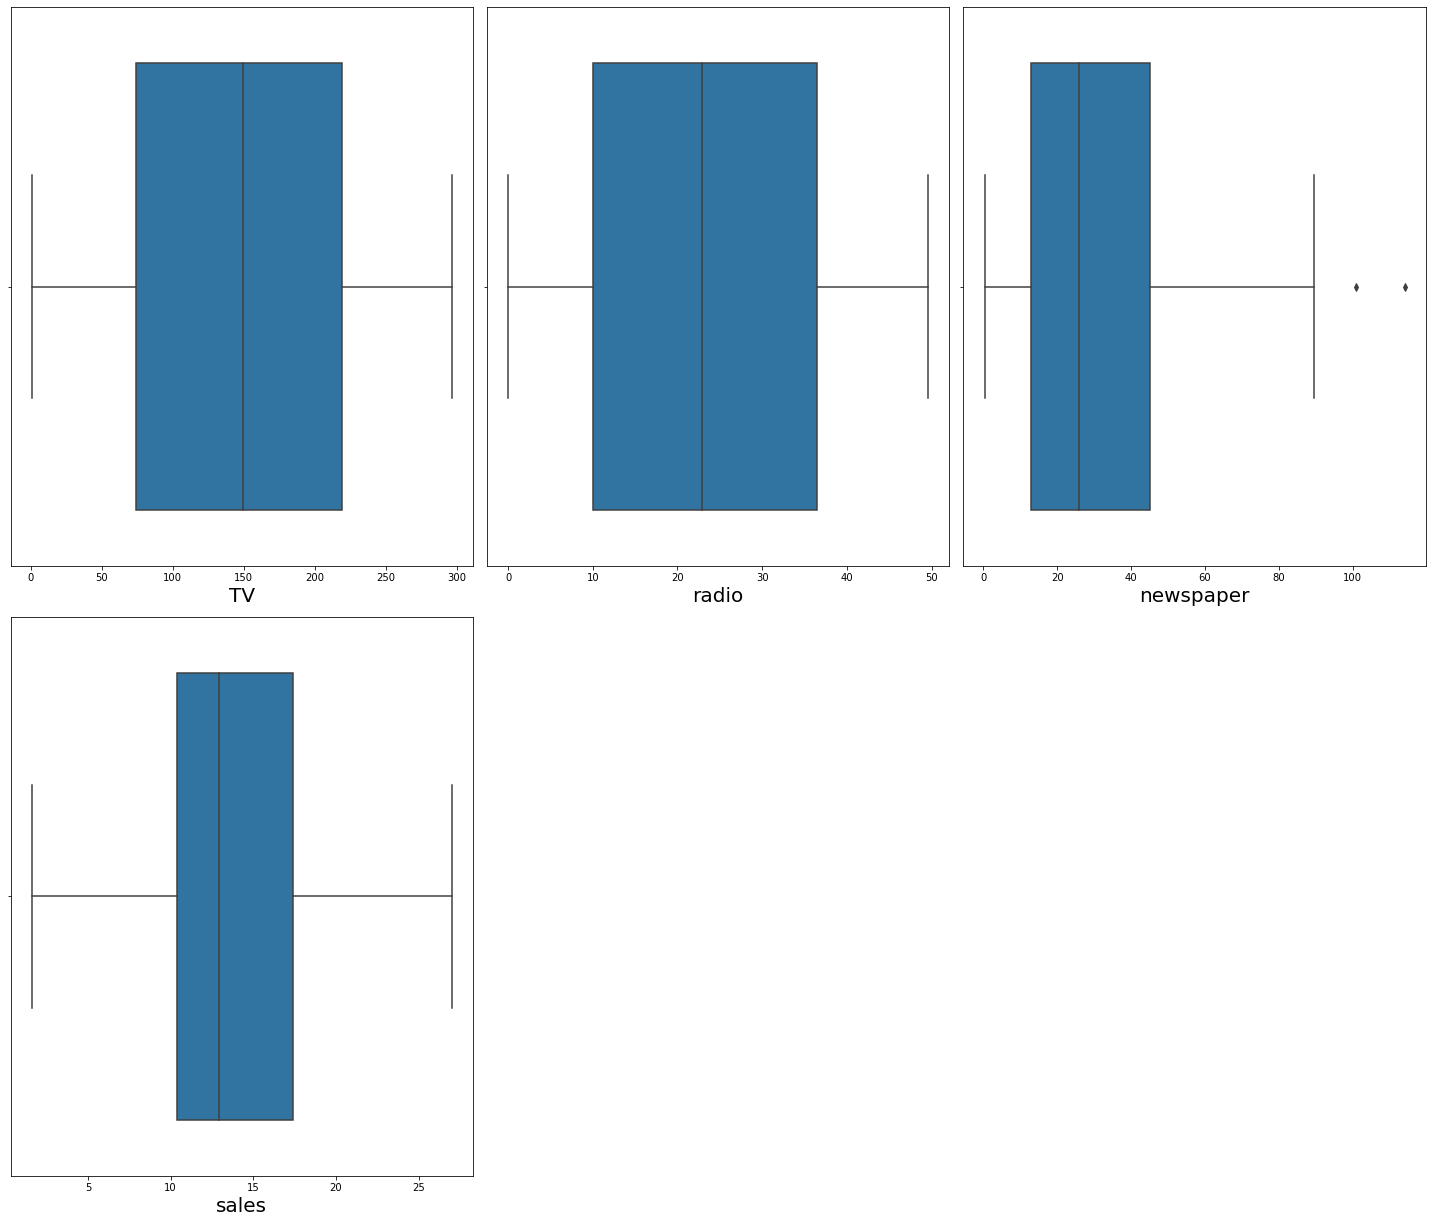

In [75]:
plt.figure(figsize=(20,25))

plotnumber=1

for column in df:
    if plotnumber<=9 : 
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [ ]:
#No such ouliers present in our data we are good to for model building,feature importance
# and prediction

<AxesSubplot:>

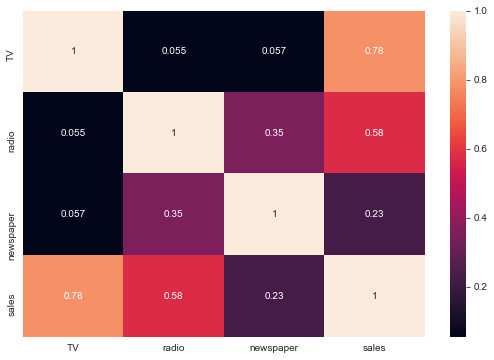

In [77]:
#HeatMap
sns.set_style("darkgrid")
plt.figure(figsize=(9,6))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [ ]:
#Sales and Tv , Radio are highly correlated
#Newspaper ad gives less sales so we can conlcuse that more amount of money
#should be invested in TV ads and Radio ads to increase sales

# Model Building

In [154]:
#Splitting data into and training and testing

x = df.drop(columns=['sales'])
y = df['sales']

In [155]:
#Scaling Data

scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)
X_scaled.shape

(200, 3)

In [156]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=340)

In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
lr = LinearRegression()

In [159]:
lr.fit(x_train,y_train)

LinearRegression()

In [160]:
#Adjusted R2 score / Model Confidence

lr.score(x_train,y_train)

0.8953727826473016

In [161]:
print ('sales : ' , lr.predict(scalar.transform([[230.1,37.8,69.2]])))

sales :  [20.49108467]


Above, we can give input according to data received and our model will be able to precdict 'Sales'

In [115]:
#Checking on test data

lr.score(x_test,y_test)

0.8997745685210154

In [117]:
#Let's Plot and Visualize

y_pred = lr.predict(x_test)

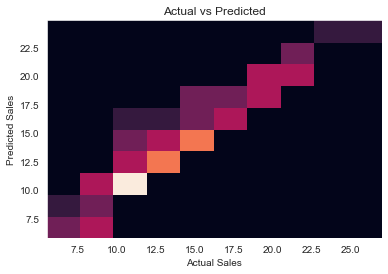

In [126]:
plt.hist2d(y_test,y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted')
plt.show()

In [127]:
#Model Evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [128]:
y_pred = lr.predict(x_test)

In [130]:
print ('MAE : ' , mean_absolute_error(y_test,y_pred))

MAE :  1.1397134163053737


In [131]:
print( 'MSE : ' , mean_squared_error(y_test,y_pred))

MSE :  2.2042676586564784


In [133]:
print ( 'RMSE : ' , np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE :  1.484677627856121


In [163]:
import statsmodels.api as sm

In [166]:
X_train_sm = sm.add_constant(x_train)

In [167]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [168]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     388.0
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           1.92e-66
Time:                        17:09:14   Log-Likelihood:                -276.97
No. Observations:                 140   AIC:                             561.9
Df Residuals:                     136   BIC:                             573.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0732      0.150     93.761      0.000      13.776      14.370
x1             4.0127      0.151     26.536      0.000       3.714       4.312
x2             2.7432      0.158     17.372      0.000       2.431       3.055
x3            -0.0935      0.162     -0.577      0.565      -0.414       0.227
==============================================================================
Omnibus:                       49.267   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.343
Skew:                          -1.429   Prob(JB):                     1.65e-27
Kurtosis:                       6.603   Cond. No.                         1.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Let's check whether or model is overfitting or Underfitting using Regularization Techniques

In [134]:
#Regularization

from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [135]:
lassocv = LassoCV(alphas = None , max_iter=1000 , normalize = True)
lassocv.fit(x_train,y_train)

LassoCV(normalize=True)

In [136]:
alpha = lassocv.alpha_
alpha

0.007862731019926614

In [138]:
#Now that we have the best parameter , let's use Lasso Regression and see how well our
#data fitted before

lass_reg = Lasso(alpha)
lass_reg.fit(x_train,y_train)

Lasso(alpha=0.007862731019926614)

In [139]:
lass_reg.score(x_test,y_test)

0.9000858558225571

In [140]:
#Checking for Ridge
ridge_cv = RidgeCV(alphas = np.arange(0.001,0.01,2), normalize = True)

In [141]:
ridge_cv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001]), normalize=True)

In [143]:
ridge_model = Ridge(alpha=ridge_cv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [144]:
ridge_model.score(x_test,y_test)

0.8997751941872342

In [178]:
#Saving and loading Model

from joblib import dump, load

final_model=LinearRegression()
final_model.fit(x,y)
dump(final_model, 'Sales.lib')


['Sales.lib']

In [179]:
load_model=load('Sales.lib')

#it will loadthe model

In [181]:
sales=[[100, 73, 19]]
load_model.predict(sales)

array([21.25833278])